In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow==2.0.0-beta1
import tensorflow as tf
import matplotlib.pyplot as plt

     |████████████████████████████████| 87.9MB 49.5MB/s 
     |████████████████████████████████| 501kB 41.9MB/s 
     |████████████████████████████████| 3.1MB 29.1MB/s 
ERROR: ethnicolr 0.2.1 has requirement tensorflow==1.12.3, but you'll have tensorflow 2.0.0b1 which is incompatible.
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
tf.executing_eagerly()

True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from PIL import Image

In [4]:
data_dir = '../input/master/P1_Facial_Keypoints-master/data'
training_dir = '../input/master/P1_Facial_Keypoints-master/data/training'
test_dir = '../input/master/P1_Facial_Keypoints-master/data/test'

In [5]:
label_frame = pd.read_csv(os.path.join(data_dir,'training_frames_keypoints.csv'), index_col='Unnamed: 0')
label_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,125.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,119.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,103.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,132.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,130.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [6]:
test_label_frame = pd.read_csv(os.path.join(data_dir,'test_frames_keypoints.csv'), index_col='Unnamed: 0')
test_label_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
James_Wolfensohn_00.jpg,25.0,44.0,25.0,49.0,25.0,54.0,25.0,59.0,26.0,64.0,...,42.0,65.0,46.0,65.0,42.0,65.0,39.0,65.0,38.0,65.0
Valerie_Harper_30.jpg,55.0,62.0,52.0,72.0,52.0,83.0,55.0,90.0,55.0,101.0,...,78.0,104.0,88.0,106.0,78.0,106.0,75.0,104.0,70.0,104.0
Kristen_Breitweiser_11.jpg,60.0,88.0,60.0,98.0,63.0,109.0,65.0,116.0,68.0,127.0,...,96.0,114.0,106.0,117.0,96.0,117.0,94.0,117.0,89.0,117.0
Elizabeth_Dole_31.jpg,41.0,96.0,43.0,104.0,47.0,113.0,49.0,120.0,56.0,128.0,...,98.0,118.0,103.0,118.0,98.0,120.0,96.0,122.0,94.0,122.0
Kit_Bond_20.jpg,35.0,67.0,37.0,74.0,41.0,81.0,44.0,87.0,48.0,96.0,...,76.0,96.0,83.0,93.0,76.0,98.0,73.0,98.0,69.0,98.0


In [7]:
label_frame.shape

(3462, 136)

In [8]:
test_label_frame.shape

(770, 136)

In [9]:
def get_img_paths(path):
    file_path = os.listdir(path)
    file_path_full = [os.path.join(training_dir, x) for x in file_path]
    return file_path_full

In [10]:
training_img_paths = get_img_paths(training_dir)
len(training_img_paths)

3462

In [11]:
test_img_paths = get_img_paths(test_dir)
len(test_img_paths)

2308

In [12]:
idx = list(test_label_frame.index)
new_paths = []
for x in test_img_paths:
    y = os.path.basename(x)
    if y in idx:
        new_paths.append(x)
test_img_paths = np.array(new_paths)
test_img_paths.shape

(770,)

In [13]:
def get_labels(data_frame, img_paths=training_img_paths):
    return np.array([data_frame.loc[os.path.basename(x)].values for x in img_paths])

In [14]:
training_labels = get_labels(label_frame, training_img_paths)
test_labels = get_labels(test_label_frame, test_img_paths)
print(training_labels.shape, test_labels.shape)
print(training_labels[0].shape)

(3462, 136) (770, 136)
(136,)


In [15]:
input_size = 128

In [16]:
def _rotate_data(image, label):
    angle = tf.random.uniform([1,1], minval=-45, maxval=45)
    
    image = Image.fromarray(np.array(tf.squeeze(image)))
    image = Image.Image.rotate(image, angle)
   
    image = tf.convert_to_tensor(np.array(image))
    image = tf.expand_dims(image, -1)
    
    rad = (22*angle)/(7*180)
    cos, sin = tf.math.cos(rad), tf.math.sin(rad)
    rot_mat = np.array([[cos, -sin], [sin, cos]], dtype='float64')
    rot_mat = tf.squeeze(rot_mat)
    
    label = tf.reshape(label, [-1,2])
    
    x0 = input_size/2
    label -= (x0, x0)
    label = tf.matmul(label, rot_mat)
    label += (x0, x0)
    
    label = tf.reshape(label, [-1])
    
    return image, label

In [17]:
def _preprocess_data(image, label):
    
    mfx = input_size / image.shape[0]
    mfy = input_size / image.shape[1]

    new_label = np.zeros(label.shape)
    new_label[::2] = label[::2] * mfy
    new_label[1::2] = label[1::2] * mfx
    
    image = tf.image.resize(image, [input_size, input_size])
    image = tf.image.rgb_to_grayscale(image)
#     return image, new_label
    return _rotate_data(image, new_label)

In [18]:
def _load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image

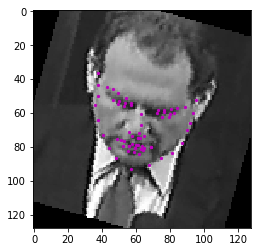

In [19]:
def check_dataset(t=0, img_paths = training_img_paths,labels = training_labels):
    img = _load_image(img_paths[t])
    label = labels[t].copy()

    img, label = _preprocess_data(img, label)
    
    img = tf.squeeze(img)
    label = tf.reshape(label, [-1,2])
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.scatter(label[:, 0], label[:, 1], s=20, marker='.', c='m')
    plt.show()
    
check_dataset(100)

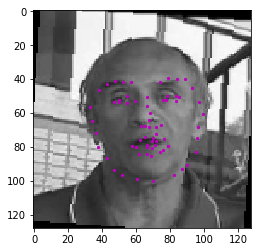

In [20]:
check_dataset(0, test_img_paths, test_labels)

dataset variables
* training_labels
* training_img_paths

# model

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
!wget 'https://www.kaggleusercontent.com/kf/18233839/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..BfTDA0Blro9eIy1dl4UVpg.Mf_2a9Ij_7fgsZmhivYj44MDIngT7YaW9RLQT8HiFxnvJhX-YjJhhIWqH58godjcHtykW0G-lY81KLwHtVrDiAmqXjEdsnkmemwDPQz-ShMxCiDWR6mXBHOUGM-c1eFrmAQ1VYq0WHTWUNxGeeg0mEIuKCARsNRIQ6pcKxdLXgk.oSf8WyatV_djYgkKuSsyjw/model8.h5'

--2019-08-03 17:24:08--  https://www.kaggleusercontent.com/kf/18233839/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..BfTDA0Blro9eIy1dl4UVpg.Mf_2a9Ij_7fgsZmhivYj44MDIngT7YaW9RLQT8HiFxnvJhX-YjJhhIWqH58godjcHtykW0G-lY81KLwHtVrDiAmqXjEdsnkmemwDPQz-ShMxCiDWR6mXBHOUGM-c1eFrmAQ1VYq0WHTWUNxGeeg0mEIuKCARsNRIQ6pcKxdLXgk.oSf8WyatV_djYgkKuSsyjw/model8.h5
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercontent.com (www.kaggleusercontent.com)|35.190.26.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66535584 (63M) [application/octet-stream]
Saving to: ‘model8.h5’

model8.h5           100%[===================>]  63.45M   142MB/s    in 0.4s    

2019-08-03 17:24:09 (142 MB/s) - ‘model8.h5’ saved [66535584/66535584]



In [23]:
model1 = keras.models.load_model('model8.h5')

In [24]:
model1.summary()

Model: "m1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d_1[0][0]                   
_________________________________________________________________________________________________

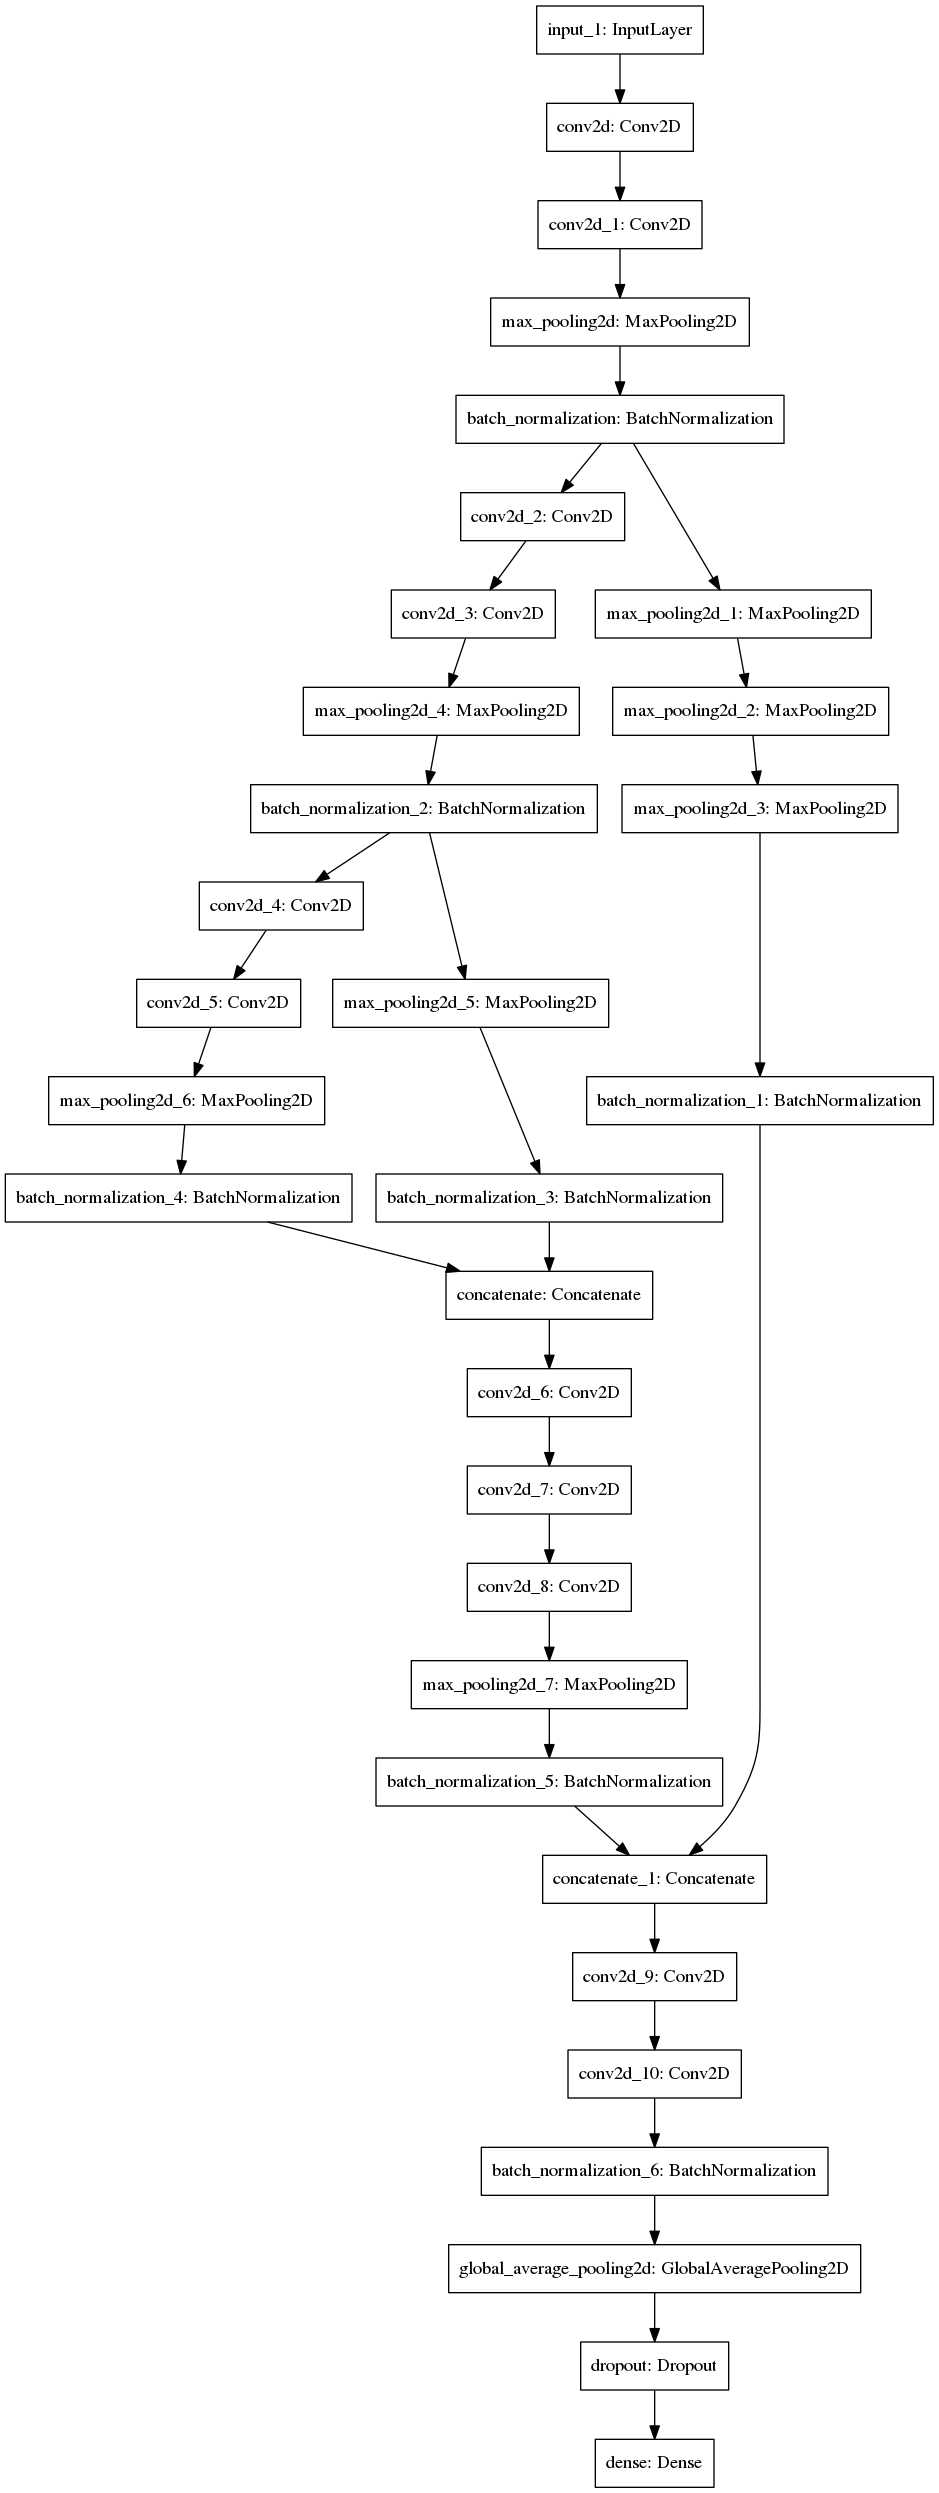

In [25]:
keras.utils.plot_model(model1, 'model1.png')

In [26]:
model1.compile(optimizer=tf.keras.optimizers.Adam() ,
              loss='mae')

In [27]:
len(model1.trainable_variables)

38

# training
dataset variables
* training_labels
* training_img_paths

In [28]:
BATCH_SIZE = 1024
steps_per_epoch=tf.math.ceil(BATCH_SIZE/32).numpy()
steps_per_epoch

32.0

In [29]:
def train_step(images, labels):
#     print('train step')
    model1.fit(images, labels, epochs=5, verbose=1, batch_size=32)#, steps_per_epoch=steps_per_epoch)

In [30]:
def train_model(epochs, image_paths = training_img_paths, train_labels = training_labels):
    images = np.zeros((BATCH_SIZE,input_size, input_size,1))
    labels = np.zeros((BATCH_SIZE,train_labels.shape[1]))
    
    for epoch in range(epochs):
        print(epoch+1, end=' ')
        x = tf.random.uniform([BATCH_SIZE], minval=0, maxval=len(image_paths), dtype=tf.dtypes.int32)
        for i in range(BATCH_SIZE):
            image = _load_image(image_paths[x[i]])
            label = train_labels[x[i]].copy()
            images[i], labels[i] = _preprocess_data(image, label)
            
#         print('here')
#         print(images.shape)
        train_step(images, labels)
        

In [31]:
train_model(5)

1 Train on 1024 samples
Epoch 1/5
1024/1024 [==============================] - 409s 400ms/sample - loss: 2.7864
Epoch 2/5
1024/1024 [==============================] - 414s 405ms/sample - loss: 2.7311
Epoch 3/5
1024/1024 [==============================] - 415s 405ms/sample - loss: 2.6875
Epoch 4/5
1024/1024 [==============================] - 416s 407ms/sample - loss: 2.7078
Epoch 5/5
1024/1024 [==============================] - 415s 405ms/sample - loss: 2.6890
2 Train on 1024 samples
Epoch 1/5
1024/1024 [==============================] - 415s 405ms/sample - loss: 2.6543
Epoch 2/5
1024/1024 [==============================] - 417s 407ms/sample - loss: 2.6537
Epoch 3/5
1024/1024 [==============================] - 415s 405ms/sample - loss: 2.6749
Epoch 4/5
1024/1024 [==============================] - 400s 391ms/sample - loss: 2.7219
Epoch 5/5
1024/1024 [==============================] - 394s 385ms/sample - loss: 2.7039
3 Train on 1024 samples
Epoch 1/5
1024/1024 [===========================

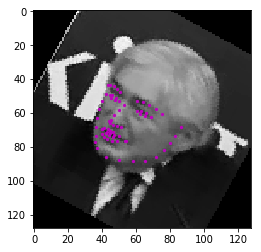

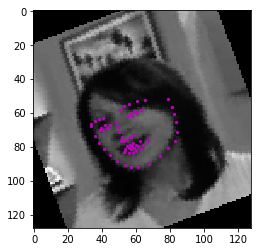

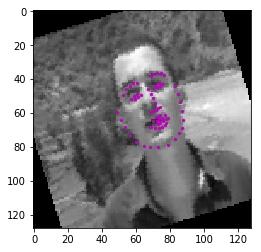

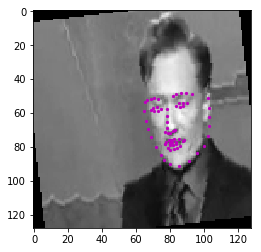

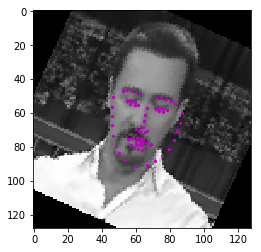

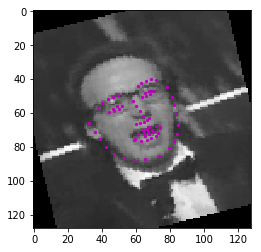

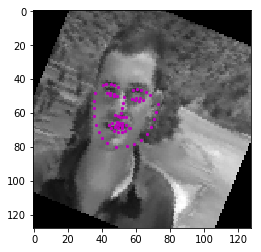

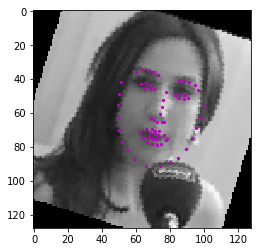

In [32]:
def check_model(t=0):

    img = _load_image(training_img_paths[t])
    label = training_labels[t].copy()

    img, true_label = _preprocess_data(img, label)
    img = tf.reshape(img, [1,input_size, input_size,1])
    label = model1.predict(img).reshape((-1,2))
    
    img = tf.squeeze(img)
    label = tf.reshape(label, [-1,2])
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.scatter(label[:, 0], label[:, 1], s=20, marker='.', c='m')
    plt.show()

#     true_label = tf.reshape(true_label, [-1,2])
#     plt.figure()
#     plt.imshow(img, cmap='gray')
#     plt.scatter(true_label[:, 0], true_label[:, 1], s=20, marker='.', c='m')
#     plt.show()


for i in [0,10,110,1110,1,11,111,1111]:
    check_model(i)


In [33]:
model1.save('model9.h5')

# Recreate the exact same model purely from the file:
# model = keras.models.load_model('path_to_my_model.h5')

In [34]:
train_model(5)

1 Train on 1024 samples
Epoch 1/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.6856
Epoch 2/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.7364
Epoch 3/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.6923
Epoch 4/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.7628
Epoch 5/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.7576
2 Train on 1024 samples
Epoch 1/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.7906
Epoch 2/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.7275
Epoch 3/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.7443
Epoch 4/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.6442
Epoch 5/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.6636
3 Train on 1024 samples
Epoch 1/5
1024/1024 [===========================

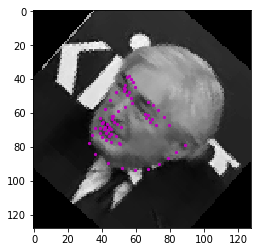

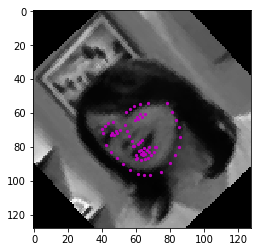

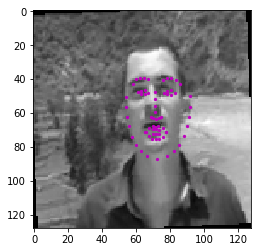

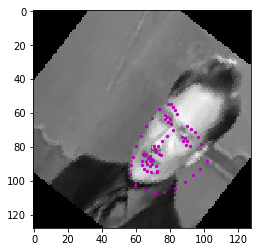

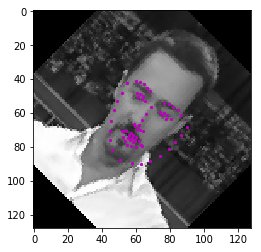

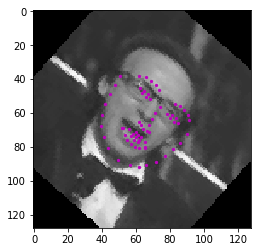

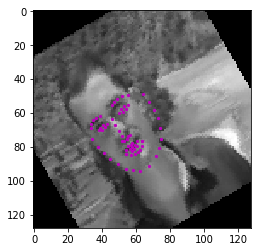

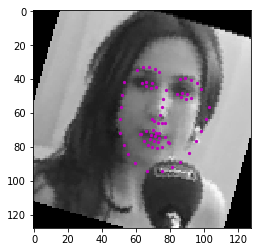

In [35]:
def check_model(t=0):

    img = _load_image(training_img_paths[t])
    label = training_labels[t].copy()

    img, true_label = _preprocess_data(img, label)
    img = tf.reshape(img, [1,input_size, input_size,1])
    label = model1.predict(img).reshape((-1,2))
    
    img = tf.squeeze(img)
    label = tf.reshape(label, [-1,2])
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.scatter(label[:, 0], label[:, 1], s=20, marker='.', c='m')
    plt.show()

#     true_label = tf.reshape(true_label, [-1,2])
#     plt.figure()
#     plt.imshow(img, cmap='gray')
#     plt.scatter(true_label[:, 0], true_label[:, 1], s=20, marker='.', c='m')
#     plt.show()


for i in [0,10,110,1110,1,11,111,1111]:
    check_model(i)


In [36]:
model1.save('model10.h5')

# Recreate the exact same model purely from the file:
# model = keras.models.load_model('path_to_my_model.h5')

In [37]:
train_model(5)

1 Train on 1024 samples
Epoch 1/5
1024/1024 [==============================] - 387s 378ms/sample - loss: 2.7059
Epoch 2/5
1024/1024 [==============================] - 387s 378ms/sample - loss: 2.6593
Epoch 3/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.7337
Epoch 4/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.5654
Epoch 5/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.5733
2 Train on 1024 samples
Epoch 1/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.7429
Epoch 2/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.6761
Epoch 3/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.6226
Epoch 4/5
1024/1024 [==============================] - 383s 374ms/sample - loss: 2.6602
Epoch 5/5
1024/1024 [==============================] - 384s 375ms/sample - loss: 2.6042
3 Train on 1024 samples
Epoch 1/5
1024/1024 [===========================

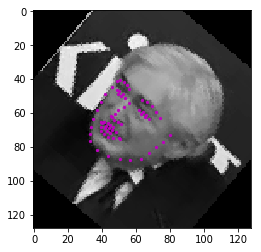

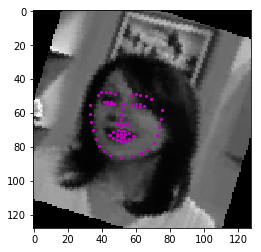

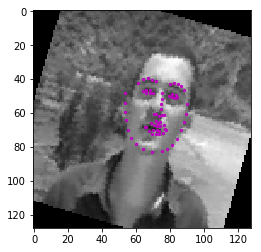

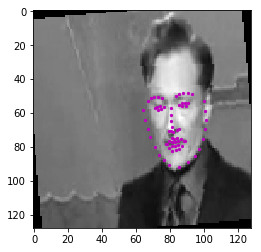

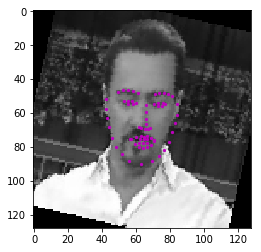

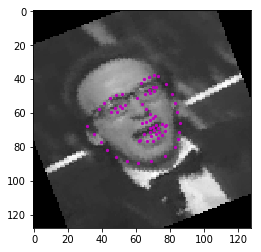

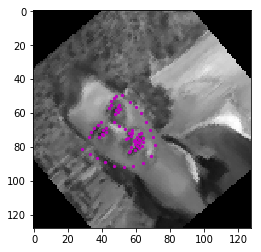

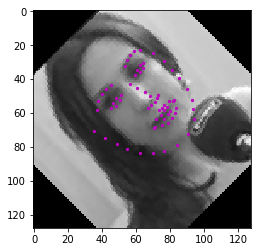

In [38]:
def check_model(t=0):

    img = _load_image(training_img_paths[t])
    label = training_labels[t].copy()

    img, true_label = _preprocess_data(img, label)
    img = tf.reshape(img, [1,input_size, input_size,1])
    label = model1.predict(img).reshape((-1,2))
    
    img = tf.squeeze(img)
    label = tf.reshape(label, [-1,2])
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.scatter(label[:, 0], label[:, 1], s=20, marker='.', c='m')
    plt.show()

#     true_label = tf.reshape(true_label, [-1,2])
#     plt.figure()
#     plt.imshow(img, cmap='gray')
#     plt.scatter(true_label[:, 0], true_label[:, 1], s=20, marker='.', c='m')
#     plt.show()


for i in [0,10,110,1110,1,11,111,1111]:
    check_model(i)


In [39]:
model1.save('model11.h5')

# Recreate the exact same model purely from the file:
# model = keras.models.load_model('path_to_my_model.h5')